# SHAP Visualizations for Model Interpretability

This notebook demonstrates various visualization techniques provided by the SHAP (SHapley Additive exPlanations) library to interpret machine learning models. We'll use a Random Forest classifier trained on a Customer Churn dataset to showcase different SHAP visualization methods.

## What is SHAP?

SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. It connects game theory with local explanations using Shapley values, which fairly distribute the "payout" (the prediction) among the "players" (the features).

SHAP provides various visualization tools that help us understand:
- Which features are most important for the model
- How each feature affects predictions
- How features interact with each other
- Why the model made a specific prediction for an individual instance

Let's explore these visualizations using a real-world example!


In [9]:
# Import necessary libraries
import shap
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize SHAP JavaScript visualization
shap.initjs()


## Loading and Preparing the Data

We'll use the Customer Churn dataset, which contains information about customers and whether they churned (left the service) or not. First, let's load the data and take a look at it.


In [15]:
# Load the Customer Churn dataset
import  os
path = os.getcwd() +'/Other Lectures/Explainability/Lecture Code/'+"Customer Churn.csv"
print(path)
customer = pd.read_csv(path)
customer.head()


/home/amir/Desktop/GWU/Mapping_Course/NLP/Other Lectures/Explainability/Lecture Code/Customer Churn.csv


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


## Data Preparation and Model Training

Now, let's prepare the data for modeling by splitting it into features (X) and target (y), and then into training and testing sets. We'll train a Random Forest classifier on this data.


In [16]:
# Split data into features and target
X = customer.drop("Churn", axis=1)
y = customer.Churn

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       818
           1       0.77      0.82      0.79       127

    accuracy                           0.94       945
   macro avg       0.87      0.89      0.88       945
weighted avg       0.94      0.94      0.94       945



## Creating a SHAP Explainer

To generate SHAP values, we first need to create a SHAP explainer for our model. The explainer will calculate SHAP values for our test data, which we'll use for various visualizations.


In [17]:
# Create a SHAP explainer for the Random Forest model
explainer = shap.Explainer(clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


## SHAP Summary Plot (Bar)

The SHAP summary bar plot shows the average absolute SHAP value for each feature across the dataset. Features are ordered by their importance, with the most important features at the top.

This plot helps us understand:
- Which features have the biggest impact on the model's predictions
- The relative importance of each feature


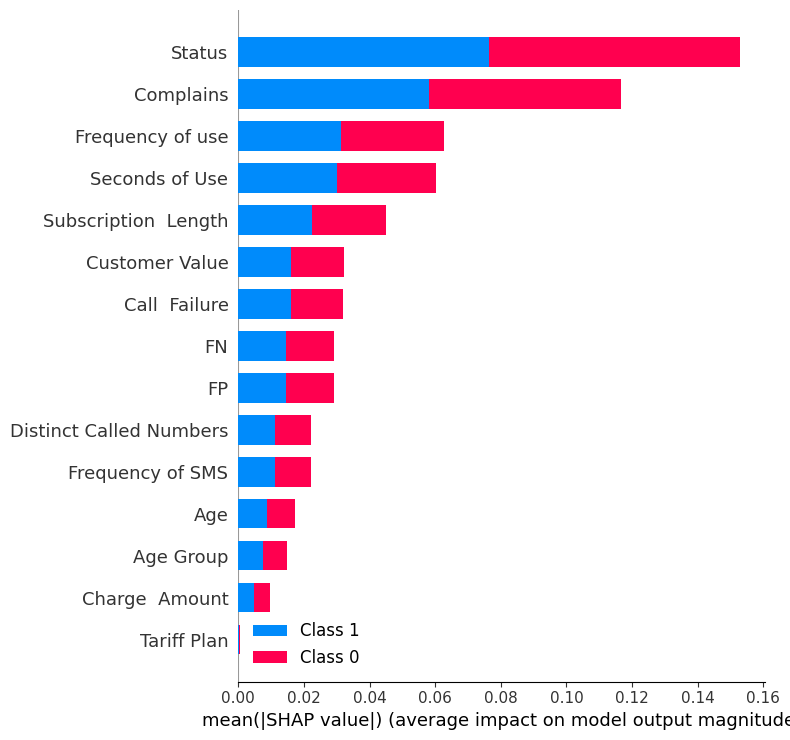

In [18]:
# Create a list of SHAP values for each class
shap_values_list = [shap_values[..., 0], shap_values[..., 1]]

# Create a summary bar plot
shap.summary_plot(shap_values_list, X_test, plot_type="bar")


## SHAP Summary Plot (Beeswarm)

The SHAP summary beeswarm plot shows the distribution of SHAP values for each feature. Each point represents a single instance, and the color represents the feature value (red is high, blue is low).

This plot helps us understand:
- Which features have the biggest impact on the model's predictions
- How the feature values affect the predictions (positively or negatively)
- The distribution of SHAP values for each feature


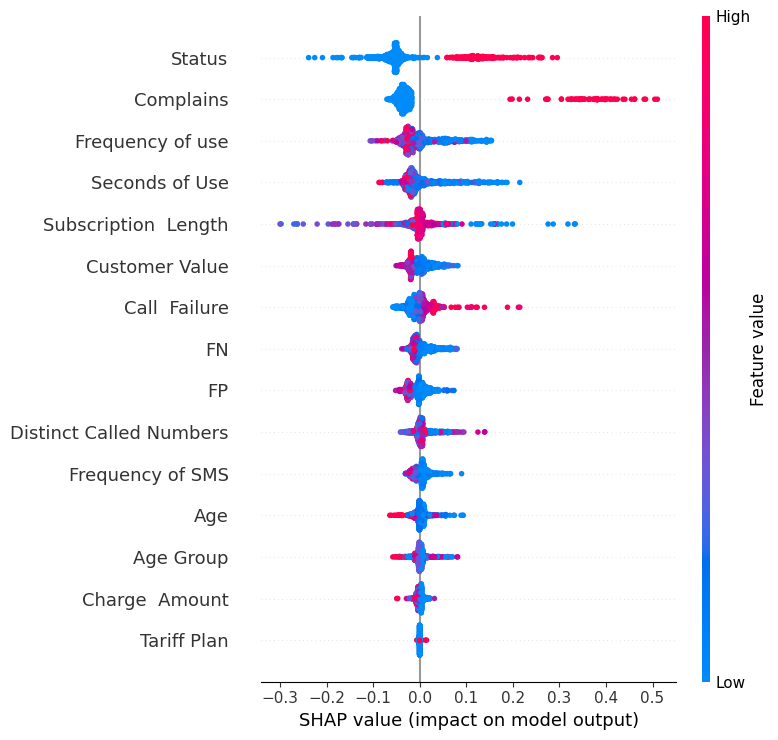

In [19]:
# Get SHAP values for class 1 (Churn)
shap_values_class1 = shap_values[..., 1]

# Create a summary beeswarm plot
shap.summary_plot(shap_values_class1, X_test, feature_names=X_test.columns)


## SHAP Dependence Plot

The SHAP dependence plot shows how a feature's value affects its SHAP value, and how it interacts with another feature. Each point represents a single instance.

This plot helps us understand:
- How a feature's value affects the model's predictions
- How features interact with each other
- Potential non-linear relationships captured by the model


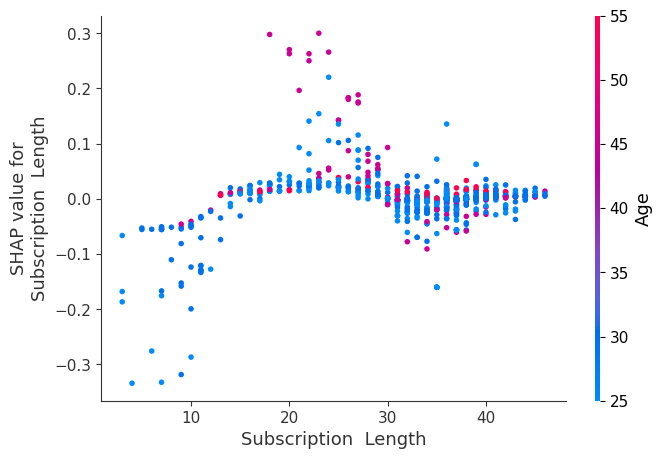

In [20]:
# Get SHAP values for class 0 (No Churn)
shap_values_class0 = shap_values[..., 0]

# Create a dependence plot for 'Subscription Length' with 'Age' as the interaction feature
shap.dependence_plot('Subscription  Length', shap_values_class0, X_test, interaction_index="Age")


## SHAP Force Plot

The SHAP force plot shows how each feature contributes to pushing the model output from the base value (average prediction) to the final prediction for a specific instance.

This plot helps us understand:
- Why the model made a specific prediction for an individual instance
- Which features pushed the prediction higher or lower
- The magnitude of each feature's contribution


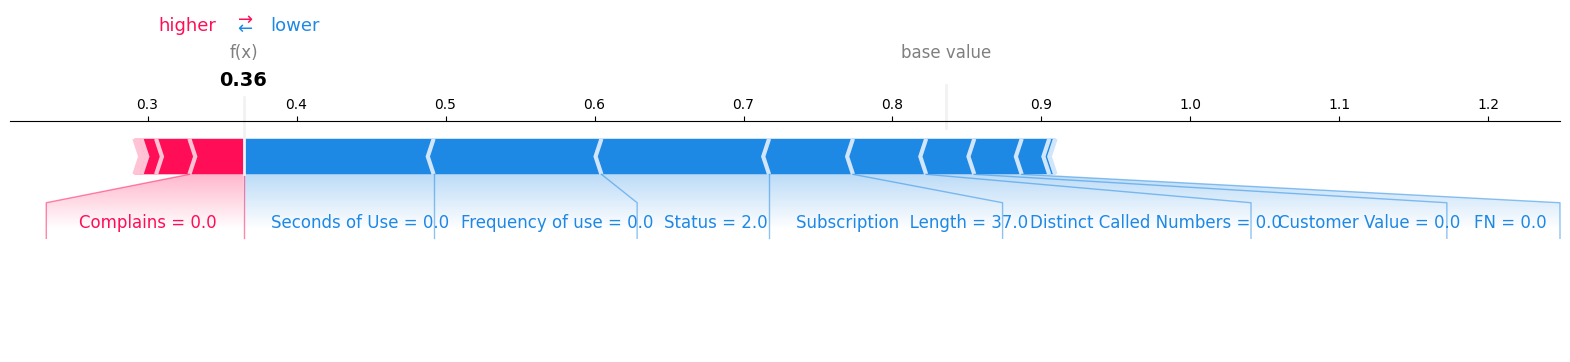

In [21]:
# Get SHAP values for the first instance in the test set
row_0_shap_values = shap_values_class0[0, :]
row_0_features = X_test.iloc[0, :]

# Create a force plot
shap.plots.force(explainer.expected_value[0], row_0_shap_values, row_0_features, matplotlib=True)


## SHAP Decision Plot

The SHAP decision plot shows how the model's prediction builds from the base value as we add features one by one, ordered by their impact on the prediction.

This plot helps us understand:
- The cumulative effect of features on the model's prediction
- The path from the base value to the final prediction
- Which features have the biggest impact on the prediction


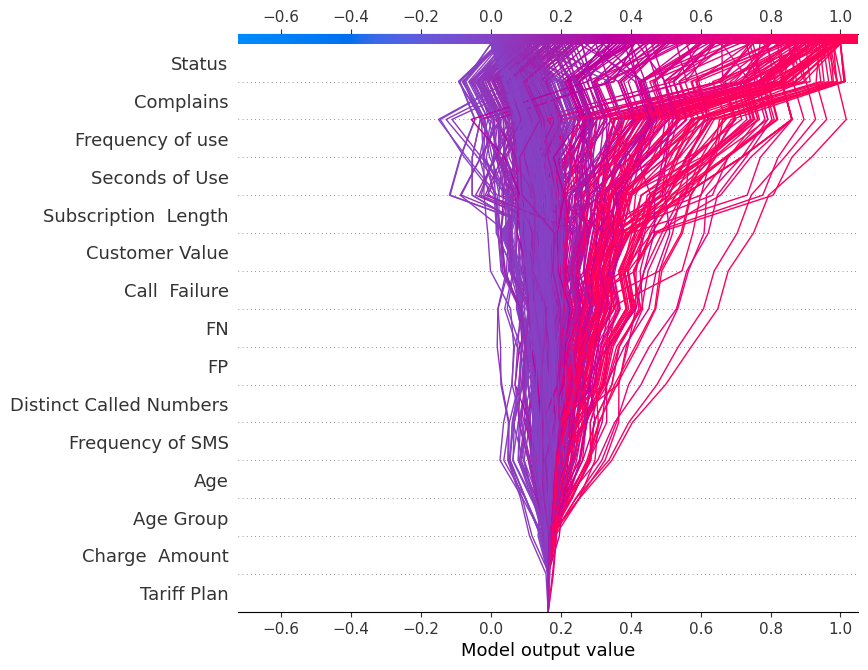

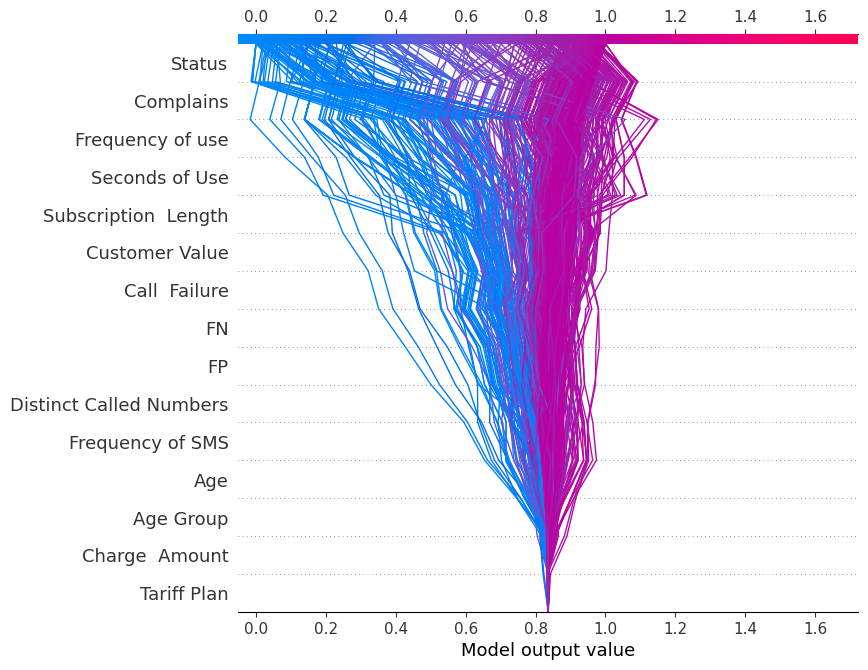

In [22]:
# Get SHAP values for class 1 (Churn)
shap_values_class1 = shap_values[..., 1]

# Create a decision plot for class 1
shap.decision_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values_class1,
    features=X_test,
    feature_names=list(X_test.columns)
)

# Get SHAP values for class 0 (No Churn)
shap_values_class0 = shap_values[..., 0]

# Create a decision plot for class 0
shap.decision_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_class0,
    features=X_test,
    feature_names=list(X_test.columns)
)


## SHAP Waterfall Plot

The SHAP waterfall plot shows how each feature contributes to pushing the model output from the base value to the final prediction for a specific instance, with features ordered by their impact.

This plot helps us understand:
- Why the model made a specific prediction for an individual instance
- Which features pushed the prediction higher or lower
- The magnitude of each feature's contribution
- The cumulative effect of features on the prediction


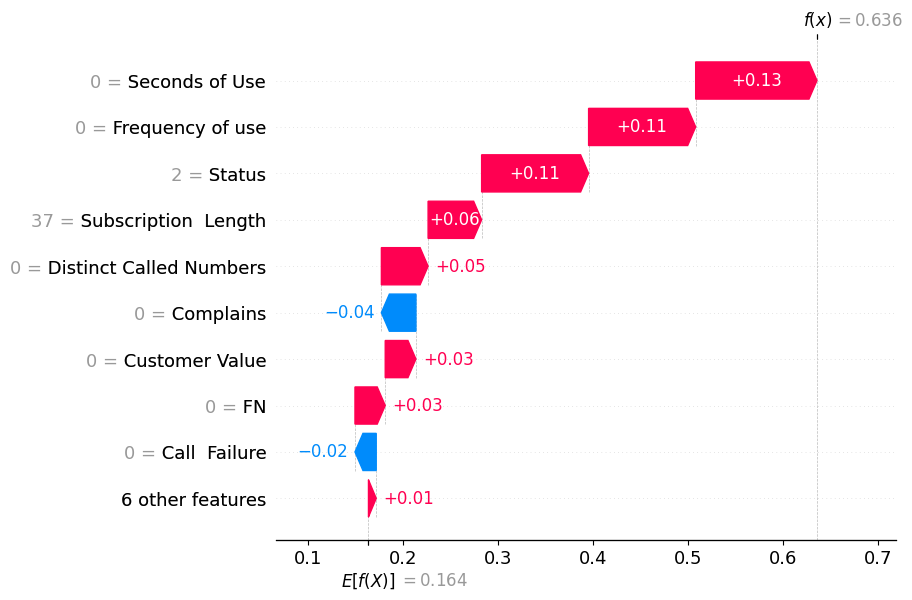

In [23]:
# Select an instance to explain
row_index = 0

# Get SHAP values for class 1 (Churn)
shap_values_class1 = shap_values[..., 1]

# Create an explanation object
explanation = shap.Explanation(
    values=shap_values_class1[row_index],
    base_values=explainer.expected_value[1],
    data=X_test.iloc[row_index],
    feature_names=X_test.columns
)

# Create a waterfall plot
shap.plots.waterfall(explanation)


## Conclusion

In this notebook, we've explored various SHAP visualization techniques to interpret a Random Forest classifier trained on a Customer Churn dataset. These visualizations help us understand:

1. **Feature Importance**: Which features are most important for predicting customer churn
2. **Feature Effects**: How each feature affects the predictions (positively or negatively)
3. **Feature Interactions**: How features interact with each other
4. **Individual Predictions**: Why the model made specific predictions for individual customers

SHAP provides a unified approach to model interpretability, with strong theoretical foundations based on Shapley values from cooperative game theory. The visualizations we've explored are just a few examples of what SHAP can do.

Key benefits of using SHAP for model interpretation:
- **Consistency**: Features with larger impacts on the model receive larger SHAP values
- **Local Accuracy**: SHAP values sum to the difference between the model prediction and the baseline
- **Missingness**: Features with missing values have no impact
- **Visualization**: Rich set of visualization tools for different aspects of model interpretation

By understanding how our models make predictions, we can:
- Build trust in our models
- Identify potential biases
- Gain insights into the underlying patterns in our data
- Make more informed decisions based on model predictions